In [1]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\saihe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-4 torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [6]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [7]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1440.0ms pre-process, 934.1ms inference, 4.0ms NMS per image at shape (1, 3, 384, 640)


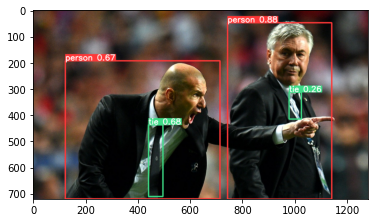

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.show()


In [12]:
np.array(results.render()).shape

(1, 720, 1280, 3)

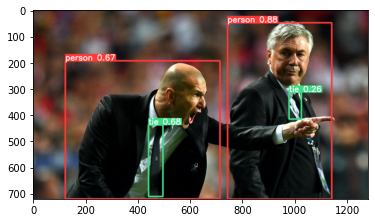

In [13]:
plt.imshow(np.squeeze(results.render()))

In [14]:
img = 'https://media.istockphoto.com/photos/city-traffic-in-india-picture-id1307527527?b=1&k=20&m=1307527527&s=170667a&w=0&h=NtUCRUOkTzioiD4AlzMkTYHo5q-Tbw7jSVvcpwTLF5U='


In [15]:
results = model(img)
results.print()

image 1/1: 359x479 1 person, 23 cars, 7 buss, 3 trucks
Speed: 194.0ms pre-process, 1253.1ms inference, 8.0ms NMS per image at shape (1, 3, 480, 640)


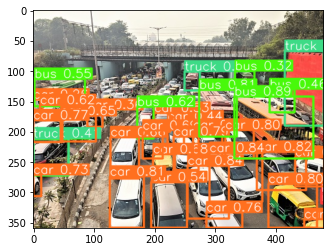

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    
    #Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [18]:
import uuid
import os
import time


In [19]:
IMAGES_PATH = os.path.join(r"C:\Users\saihe\yolov5\data\images") #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20


In [19]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [20]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

C:\Users\saihe\yolov5\data\images\awake.24de0bf0-9ba0-11ec-b045-e4e7490bae9e.jpg


In [29]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

C:\Users\saihe\yolov5\data\images\awake.7f64d85a-9b56-11ec-afa3-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64d85b-9b56-11ec-aeb6-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64d85c-9b56-11ec-b33e-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64d85d-9b56-11ec-b11b-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64d85e-9b56-11ec-938d-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64d85f-9b56-11ec-8dec-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64ff68-9b56-11ec-9646-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64ff69-9b56-11ec-aab4-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64ff6a-9b56-11ec-a2bd-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64ff6b-9b56-11ec-8bf4-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64ff6c-9b56-11ec-a25d-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\images\awake.7f64ff6d-9b56-11ec-87b4-d89c67aed880.jpg
C:\Users\saihe\yolov5\data\i

In [21]:
!git clone https://github.com/tzutalin/labelImg 

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [22]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [22]:
img = os.path.join('data', 'images', 'awake.4a7c7b40-9b56-11ec-bbba-d89c67aed880.jpg')

In [ ]:
results = model(img)

In [24]:
results.print()

image 1/1: 359x479 1 person, 23 cars, 7 buss, 3 trucks
Speed: 246.6ms pre-process, 1157.1ms inference, 6.0ms NMS per image at shape (1, 3, 480, 640)


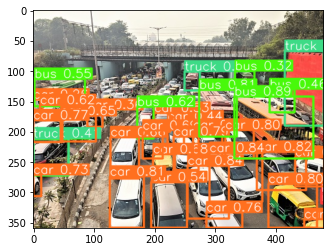

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()